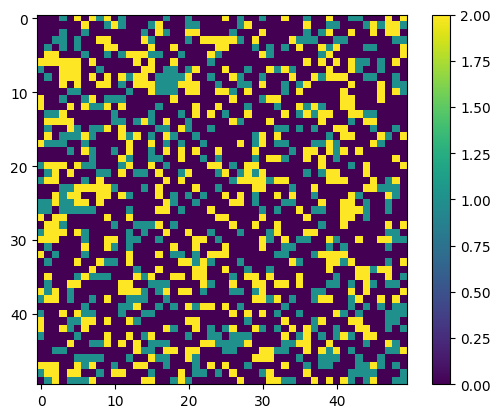

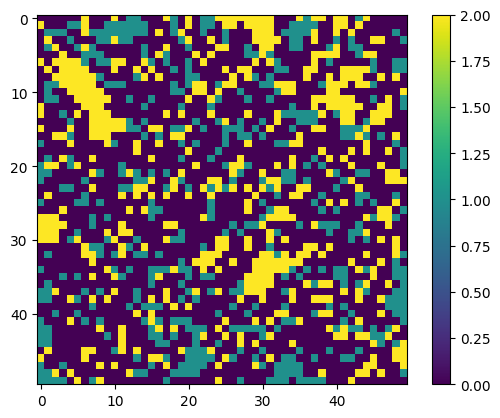

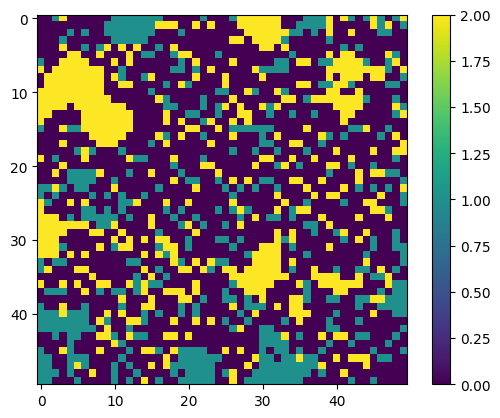

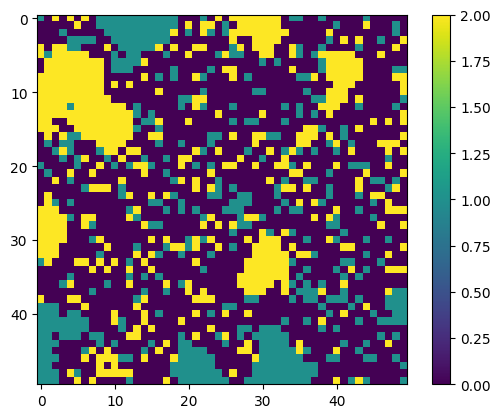

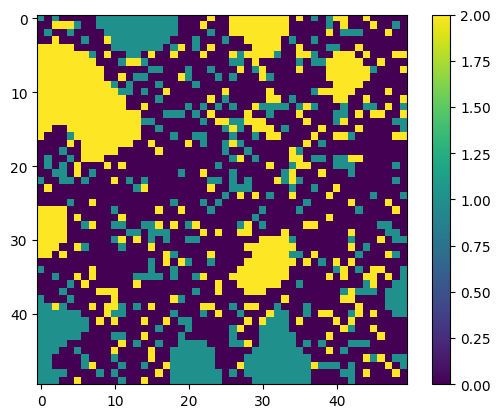

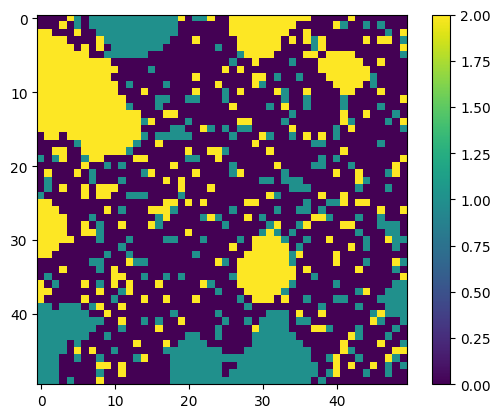

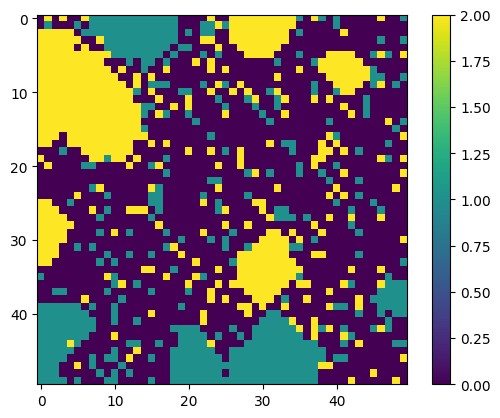

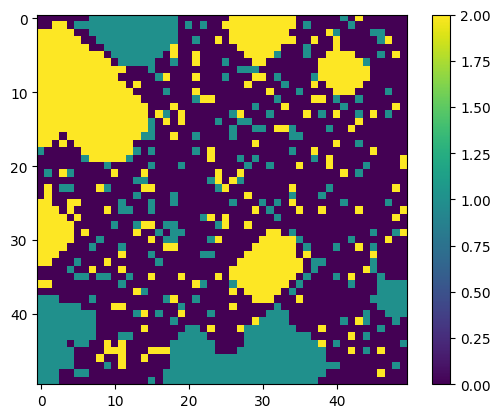

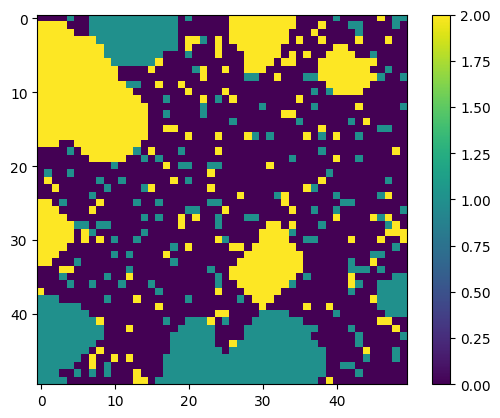

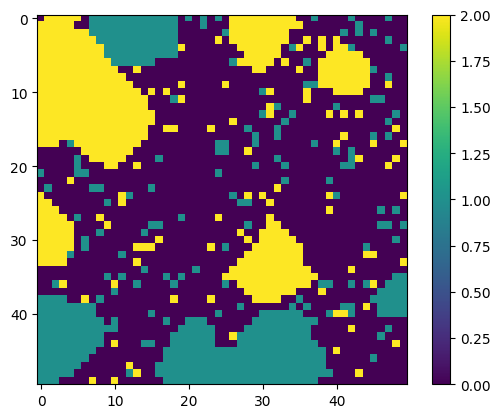

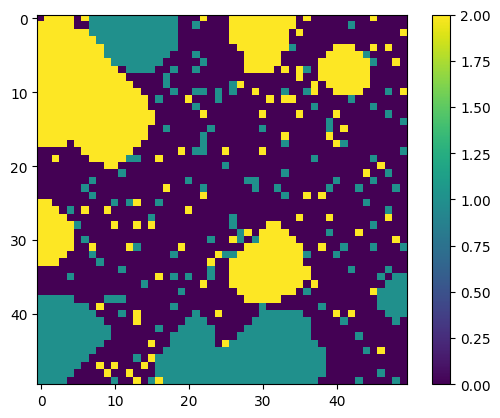

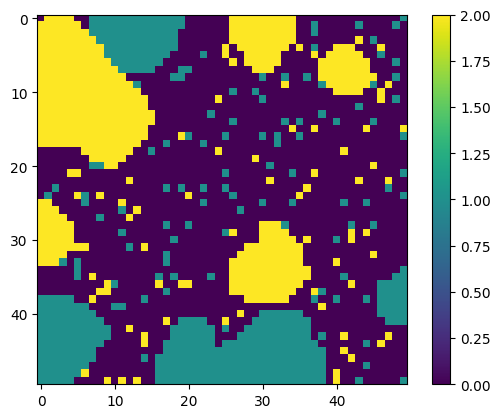

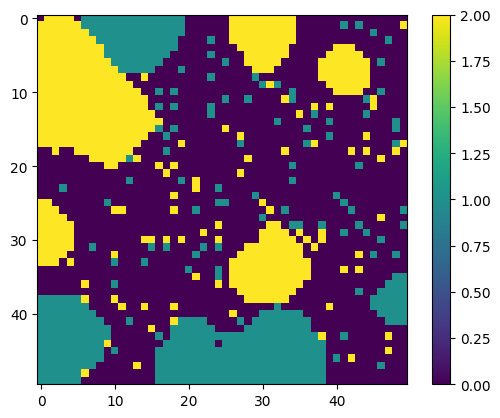

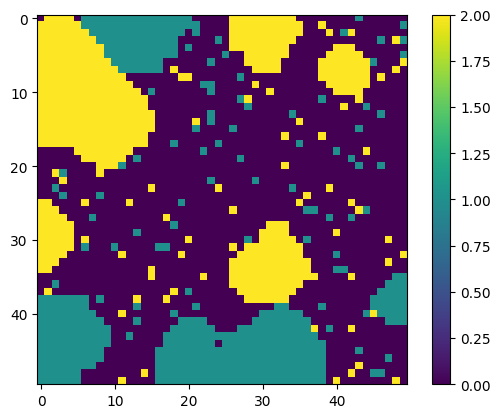

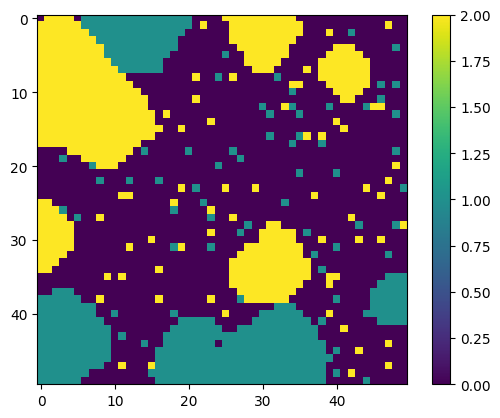

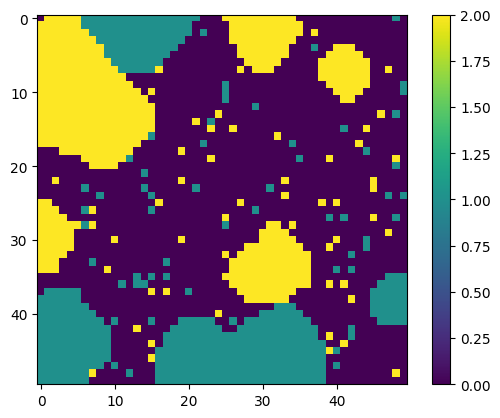

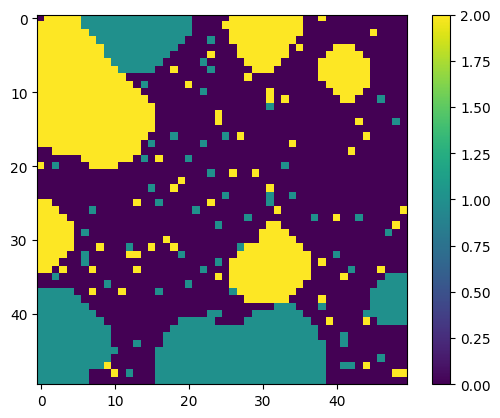

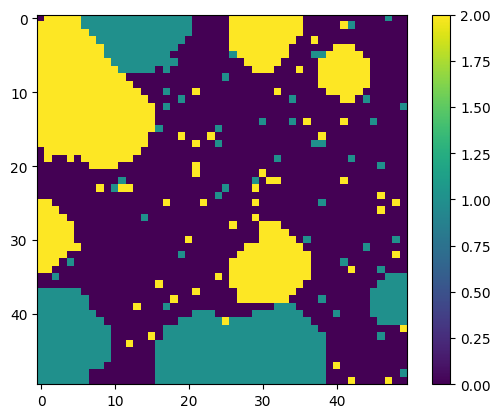

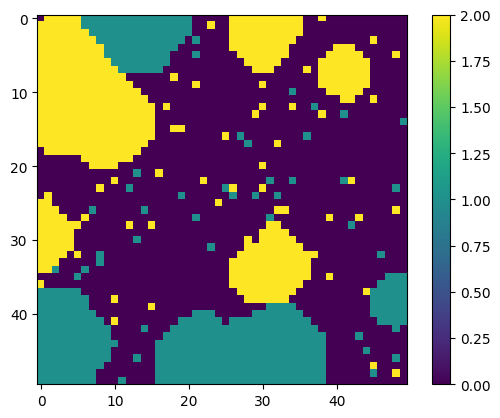

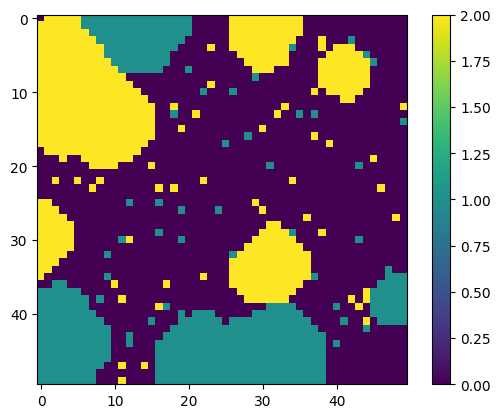

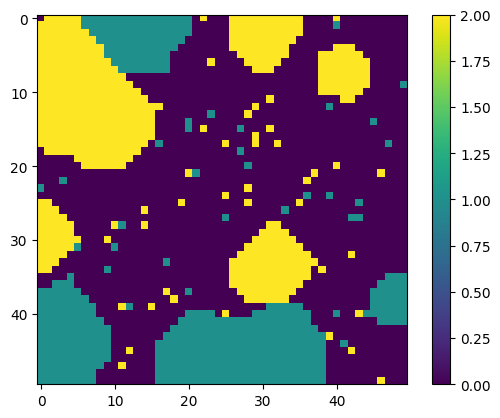

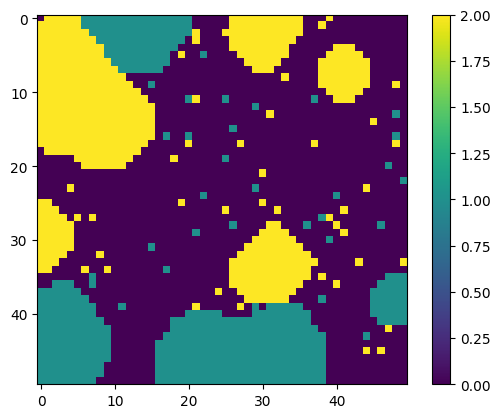

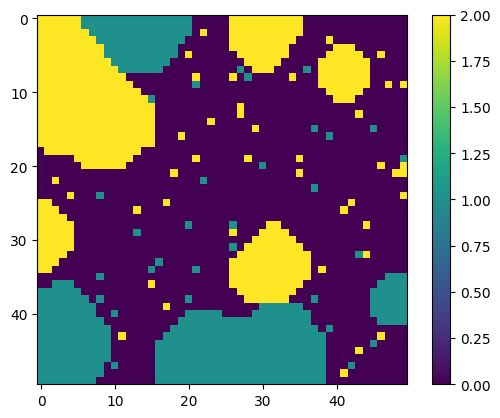

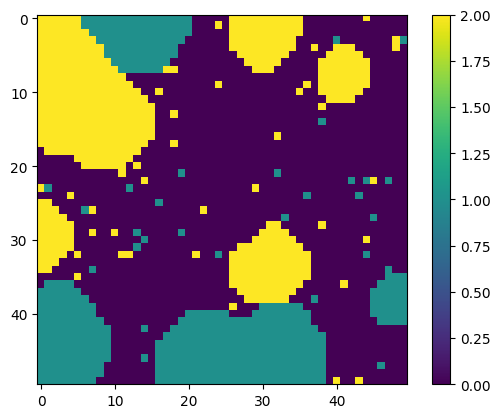

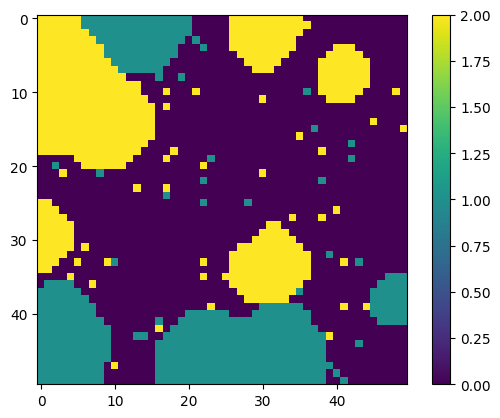

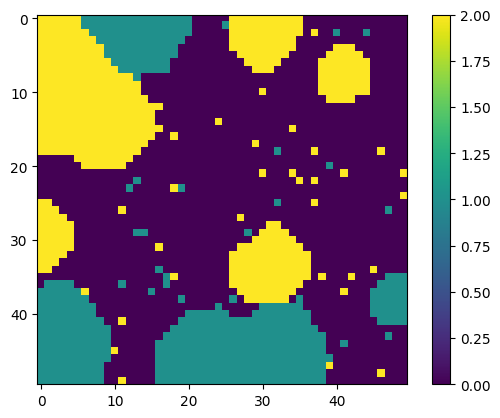

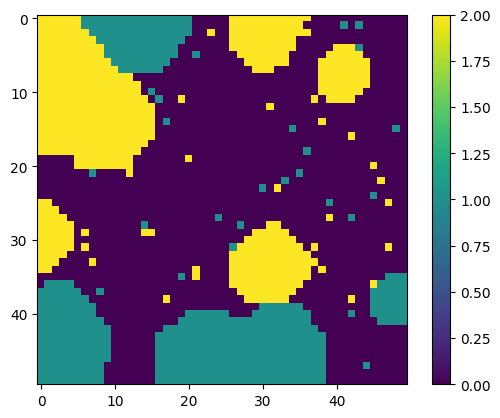

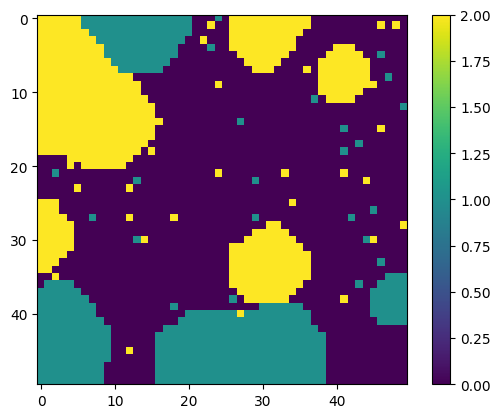

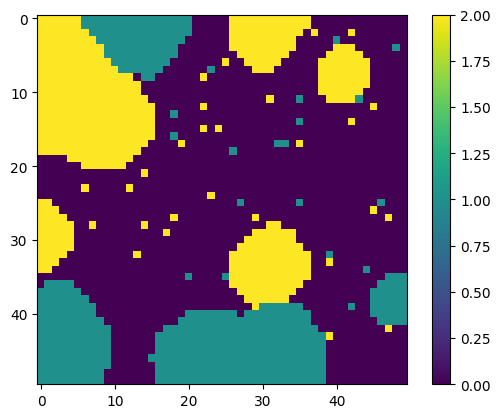

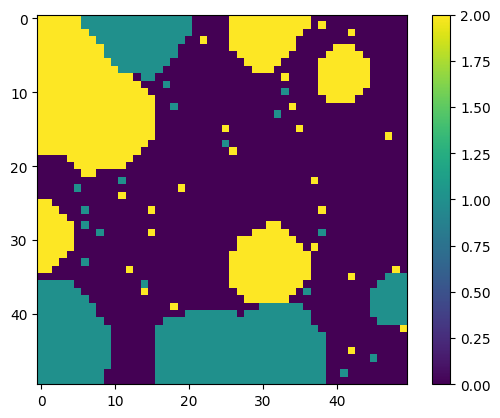

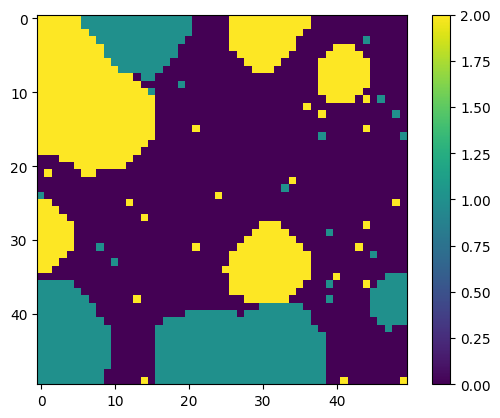

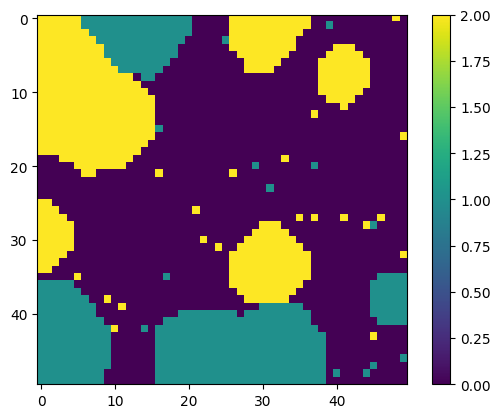

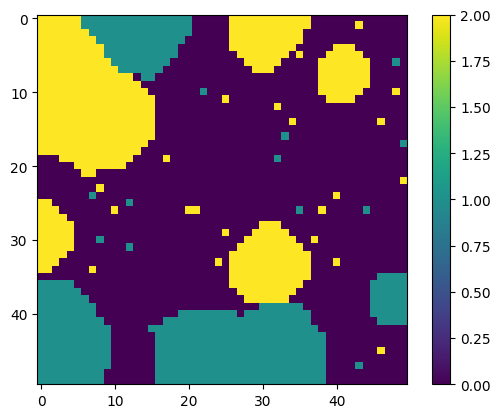

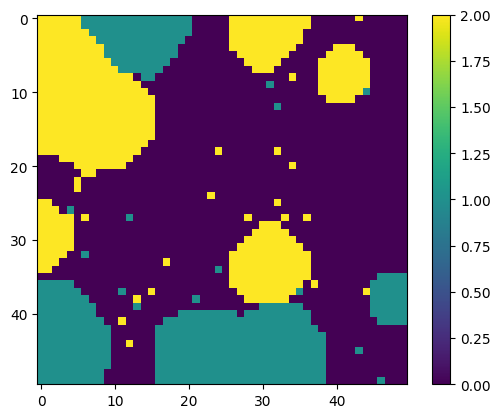

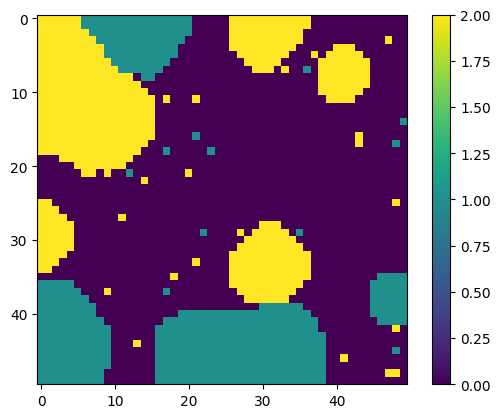

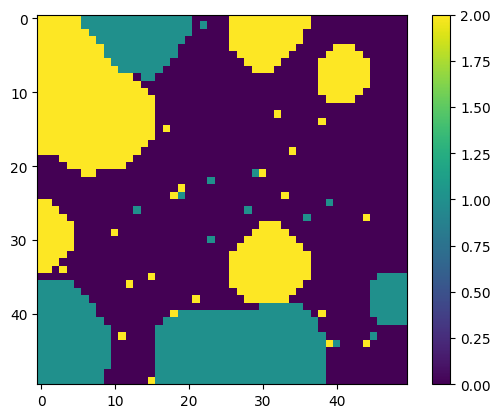

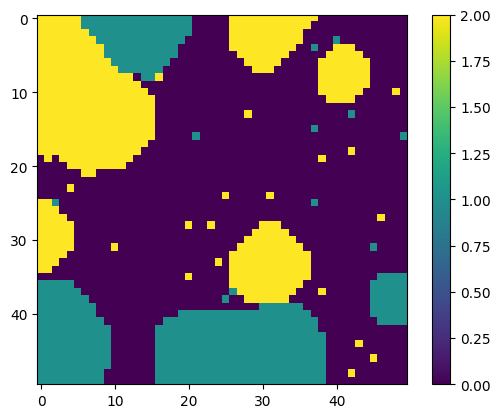

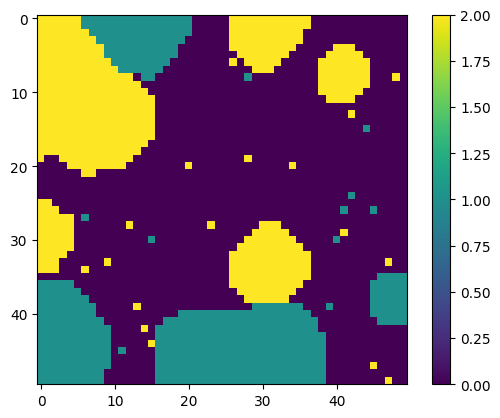

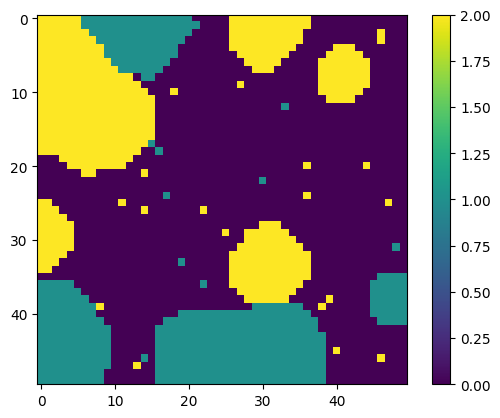

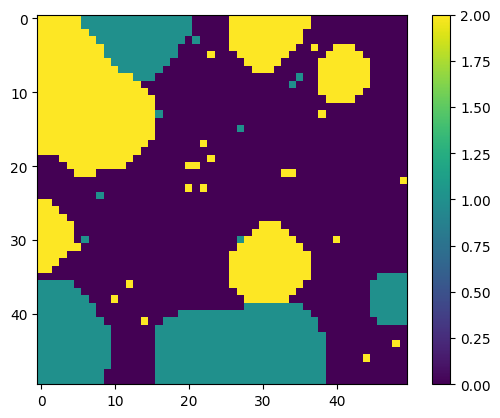

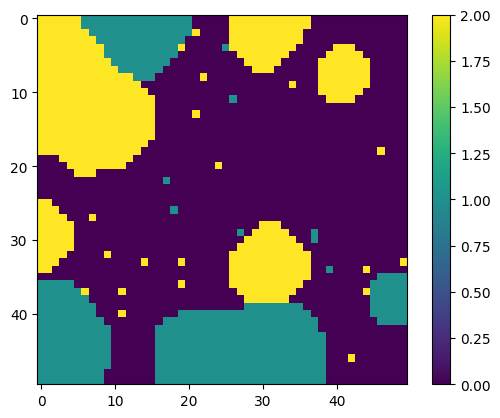

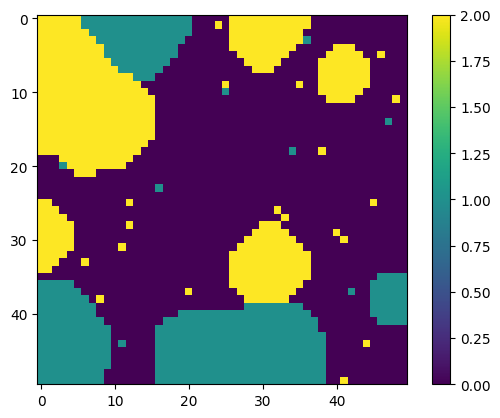

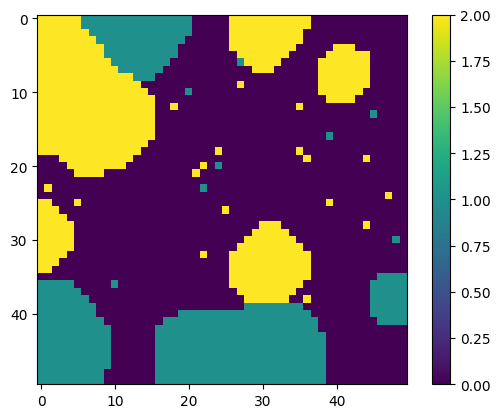

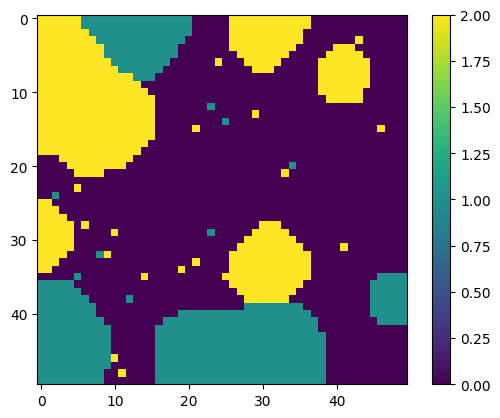

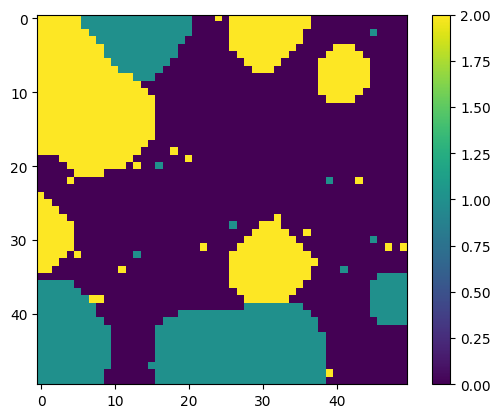

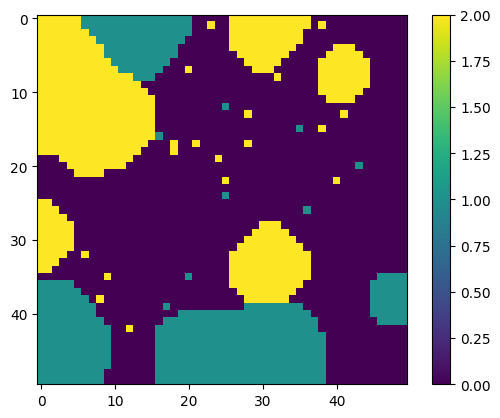

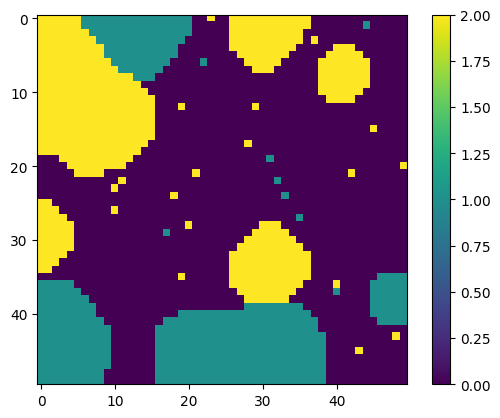

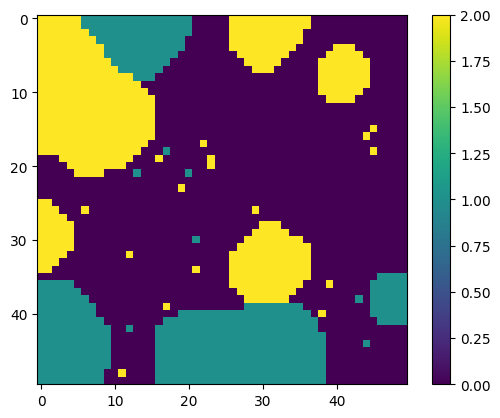

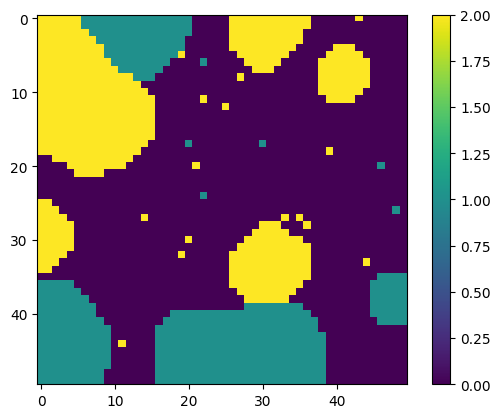

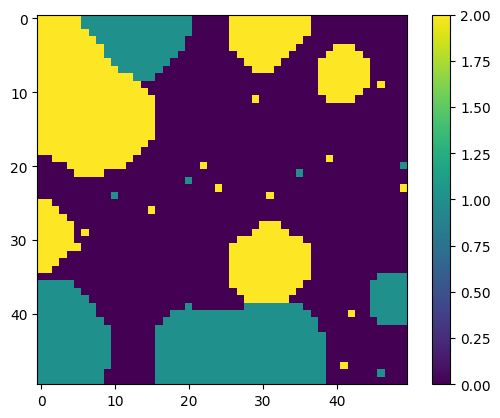

Reached maximum iterations (500)


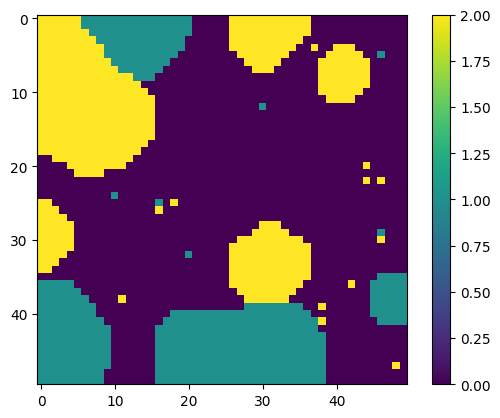

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
class SchellingModel:
    def __init__(self, grid_size, n_agents, n_types, similarity_threshold, max_iterations=500):
        self.grid_size = grid_size
        self.n_agents = n_agents
        self.n_types = n_types
        self.similarity_threshold = similarity_threshold
        self.max_iterations = max_iterations
        self.grid = np.zeros((grid_size, grid_size), dtype=int)
        self.store = []
        self.empty_cells = grid_size * grid_size - n_agents
        self.agents = []

    def initialize_grid(self):
        # Randomly place agents on the grid
        positions = np.random.choice(self.grid_size * self.grid_size, self.n_agents, replace=False)
        for pos in positions:
            x, y = divmod(pos, self.grid_size)
            agent_type = np.random.randint(1, self.n_types + 1)
            self.grid[x, y] = agent_type
            self.agents.append((x, y, agent_type))

    def get_neighbors(self, x, y):
        # Get the types of the 8 neighbors (Moore neighborhood)
        neighbors = []
        for i in range(-1, 2):
            for j in range(-1, 2):
                if i == 0 and j == 0:
                    continue
                nx, ny = x + i, y + j
                if 0 <= nx < self.grid_size and 0 <= ny < self.grid_size:
                    neighbors.append(self.grid[nx, ny])
        return neighbors

    def is_satisfied(self, x, y, agent_type):
        neighbors = self.get_neighbors(x, y)
        if not neighbors:
            return True
        similar_neighbors = sum(1 for n in neighbors if n == agent_type)
        similarity_ratio = similar_neighbors / len(neighbors)
        return similarity_ratio >= self.similarity_threshold

    def move_agent(self, agent_idx):
        x, y, agent_type = self.agents[agent_idx]
        if not self.is_satisfied(x, y, agent_type):
            # Find an empty cell to move to
            empty_cells = [(i, j) for i in range(self.grid_size) for j in range(self.grid_size) if self.grid[i, j] == 0]
            if empty_cells:
                new_x, new_y = empty_cells[np.random.choice(len(empty_cells))]
                self.grid[x, y] = 0
                self.grid[new_x, new_y] = agent_type
                self.agents[agent_idx] = (new_x, new_y, agent_type)
        

    def run(self):
        self.initialize_grid()
        for iteration in range(self.max_iterations):
            np.random.shuffle(self.agents)
            for agent_idx in range(len(self.agents)):
                self.move_agent(agent_idx)
            if iteration%10==0 :
                self.plot_grid()
            if all(self.is_satisfied(x, y, agent_type) for x, y, agent_type in self.agents):
                print(f"Converged after {iteration + 1} iterations")
                break
        else:
            print(f"Reached maximum iterations ({self.max_iterations})")

    def plot_grid(self):
        plt.imshow(self.grid, cmap='viridis', interpolation='none')
        plt.colorbar()
        plt.show()
    def get_image(self) :
        colormap = plt.get_cmap('viridis')
        temp = []
        #for image in self.store :
            #normalize = matplotlib.colors.Normalize(vmin=0, vmax=np.max(image))
            #colored_array = colormap(normalize(image))
            #temp.append(colored_array)
        return self.store

# Parameters
grid_size = 50
n_agents = 1000
n_types = 2
similarity_threshold = 0.5

# Run the model
model = SchellingModel(grid_size, n_agents, n_types, similarity_threshold)
model.run()
model.plot_grid()

In [14]:
image_list = model.get_image()

In [6]:
from PIL import Image
def make_gif(frames):
    frames = [Image.fromarray((image * 255).astype(np.uint8)) for image in frames]
    frame_folder = frames[0]
    frame_folder.save("my_awesome.gif", format="GIF", append_images=frames,
               save_all=True, fps = 2, loop=0)
    
make_gif (image_list)